# Assignment 8. Ordinary Differential Equations

This assignment investigates the solutions of the given system of equations:
                                        $$\frac{dy_1}{dx}=999y_1+1999y_2$$
                                        $$\frac{dy_2}{dx}=-1000y_1-2000y_2$$
in the region from x=0 to x=0.2 using explicit Euler, midpoint, classical Runge-Kutta method of order 4 and implicit Euler methods with given initial conditions: $y_1(0)=y_2(0)=1$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Firstly, we define the given differential equations as following functions. Also, the true solutions of the system were solved analytically and given below. 

The solutions of the system: 
                               $$y_1(x)=\frac{e^{-1000x}(3998e^{999x}-2999)}{999}$$
                               $$y_2(x)=\frac{e^{-1000x}(2999-2000e^{999x})}{999}$$

In [ ]:
def f1(x,y1,y2):
    return 999*y1+1999*y2
def f2(x,y1,y2):
    return -1000*y1-2000*y2 
def f1_exact(x):
    return (np.exp(-1000*x)*(3998*np.exp(999*x)-2999))/999
def f2_exact(x):
    return (np.exp(-1000*x)*(2999-2000*np.exp(999*x)))/999

In [ ]:
h1=0.001
a=0.0; b=0.2
x1=np.arange(a,b,h1)
plt.plot(x1,f1_exact(x1),label="$y_1(x)$")
plt.plot(x1,f2_exact(x1),label="$y_2(x)$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid()
plt.show()

### 1) Explicit Euler method:

In [4]:
def eulerexp(n,a,b):    
    y1_eul=np.zeros(n,float)
    y2_eul=np.zeros(n,float)
    y1_eul[0]=1
    y2_eul[0]=1
    h=(b-a)/n
    x=np.arange(a,b,h)
    for i in range(n-1):
        y1_eul[i+1]=y1_eul[i]+f1(x[i],y1_eul[i],y2_eul[i])*h
        y2_eul[i+1]=y2_eul[i]+f2(x[i],y1_eul[i],y2_eul[i])*h       
    return y1_eul,y2_eul

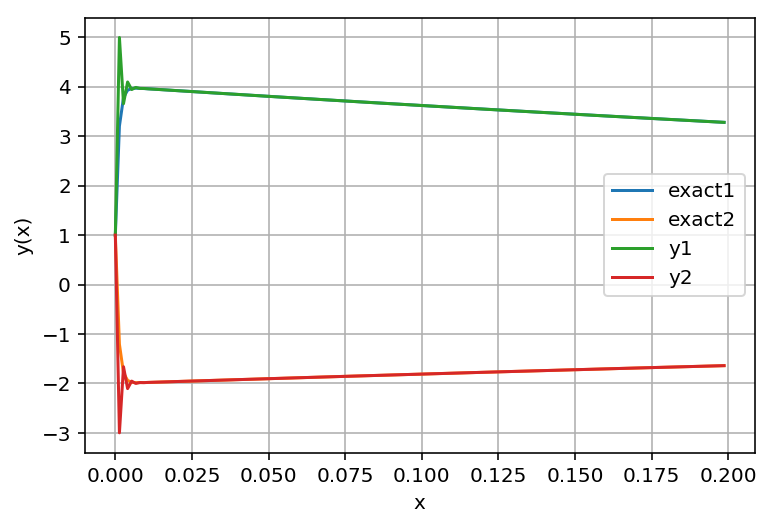

In [5]:
n=150
y1_eul,y2_eul=eulerexp(n,0,0.2)
h=(0.2-0)/n
x=np.arange(0,0.2,h)
plt.plot(x,f1_exact(x),label='exact1')
plt.plot(x,f2_exact(x),label='exact2')
plt.plot(x,y1_eul,label='y1')
plt.plot(x,y2_eul,label='y2')
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid()
plt.show()

In [30]:
h=[0.2,0.1,0.05,0.025,0.0125,6.25e-3,3.125e-3,1/640,1/1280,1/2560,1/5120,1/10240]

In [31]:
N=[1,2,4,8,16,32,64,128,256,512,1024,2048]

In [32]:
e1_eul=[]
e2_eul=[]
for i in range(12):
    x=np.arange(0,0.2,h[i])    
    y1_eul=eulerexp(N[i],0,0.2)[0]
    y2_eul=eulerexp(N[i],0,0.2)[1]
    er1_eul=abs((y1_eul[i]-f1_exact(x[i]))/f1_exact(x[i]))
    er2_eul=abs((y2_eul[i]-f2_exact(x[i]))/f2_exact(x[i]))
    e1_eul.append(er1_eul)
    e2_eul.append(er2_eul)

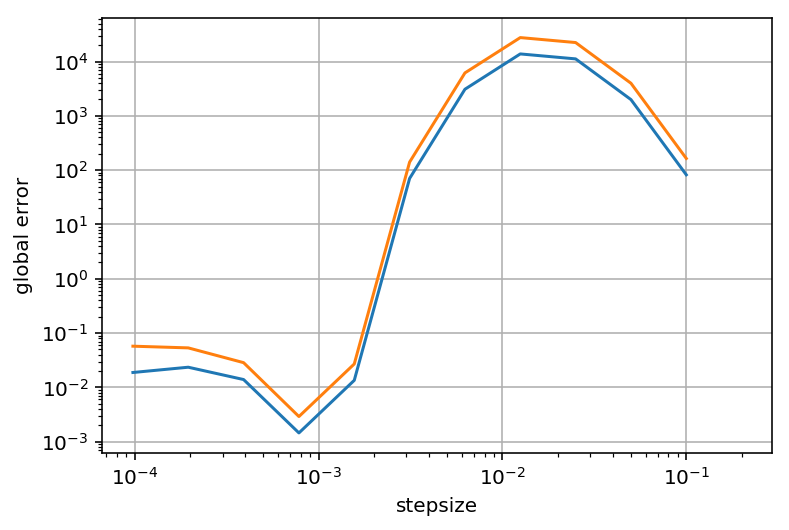

In [33]:
plt.plot(h,e1_eul)
plt.plot(h,e2_eul)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("stepsize")
plt.ylabel("global error")
plt.grid()

### 2) Midpoint method

In [34]:
def midpoint(n,a,b):
    y1_mid=np.zeros(n,float)
    y2_mid=np.zeros(n,float)
    y1_mid[0]=1
    y2_mid[0]=1
    h=(b-a)/n
    x=np.arange(a,b,h)
    for i in range(n-1):
        y1_tmp=y1_mid[i]+f1(x[i],y1_mid[i],y2_mid[i])*(h/2)
        y2_tmp=y2_mid[i]+f2(x[i],y1_mid[i],y2_mid[i])*(h/2)
        y1_mid[i+1]=y1_mid[i]+f1(x[i]+h/2,y1_tmp,y2_tmp)*h
        y2_mid[i+1]=y2_mid[i]+f2(x[i]+h/2,y1_tmp,y2_tmp)*h
    return y1_mid, y2_mid

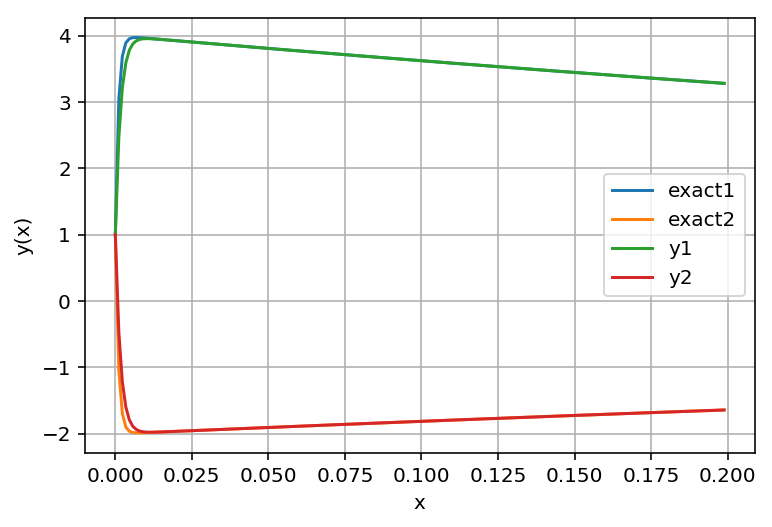

In [35]:
n=175
y1_mid,y2_mid=midpoint(n,0,0.2)
h=(0.2-0)/n
x=np.arange(0,0.2,h)
plt.plot(x,f1_exact(x),label='exact1')
plt.plot(x,f2_exact(x),label='exact2')
plt.plot(x,y1_mid,label='y1')
plt.plot(x,y2_mid,label='y2')
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid()
plt.show()

In [37]:
h=[0.2,0.1,0.05,0.025,0.0125,6.25e-3,3.125e-3,1/640,1/1280,1/2560,1/5120,1/10240]

In [38]:
e1_mid=[]
e2_mid=[]
for i in range(12):
    a=0
    b=0.2
    x=np.arange(a,b,h[i])    
    y1_mid=midpoint(N[i],0,0.2)[0]
    y2_mid=midpoint(N[i],0,0.2)[1]
    er1_mid=abs((y1_mid[i]-f1_exact(x[i]))/f1_exact(x[i]))
    er2_mid=abs((y2_mid[i]-f2_exact(x[i]))/f2_exact(x[i]))
    e1_mid.append(er1_mid)
    e2_mid.append(er2_mid)

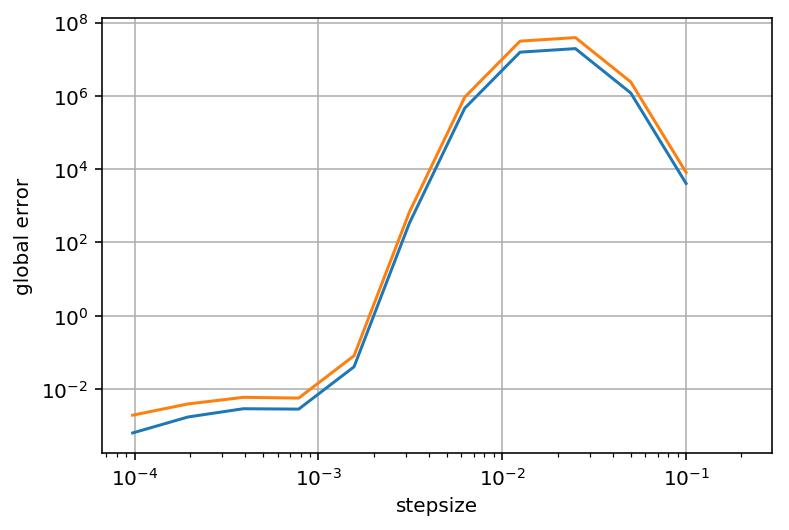

In [39]:
plt.plot(h,e1_mid)
plt.plot(h,e2_mid)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("stepsize")
plt.ylabel("global error")
plt.grid()

### 3) Classical Runge-Kutta method of order 4 

In [40]:
def rk4(n,a,b):    
    y1_rk4=np.zeros(n,float)
    y2_rk4=np.zeros(n,float)
    y1_rk4[0]=1
    y2_rk4[0]=1
    h=(b-a)/n
    x=np.arange(a,b,h)
    for i in range(n-1):
        k1=f1(x[i],y1_rk4[i],y2_rk4[i])
        l1=f2(x[i],y1_rk4[i],y2_rk4[i])
        k2=f1(x[i]+0.5*h,y1_rk4[i]+0.5*k1*h,y2_rk4[i]+0.5*l1*h)
        l2=f2(x[i]+0.5*h,y1_rk4[i]+0.5*k1*h,y2_rk4[i]+0.5*k1*h)
        k3=f1(x[i]+0.5*h,y1_rk4[i]+0.5*k2*h,y2_rk4[i]+0.5*l2*h)
        l3=f2(x[i]+0.5*h,y1_rk4[i]+0.5*k2*h,y2_rk4[i]+0.5*l2*h)
        k4=f1(x[i]+h,y1_rk4[i]+k3*h, y2_rk4[i]+l3*h)
        l4=f2(x[i]+h,y1_rk4[i]+k3*h, y2_rk4[i]+l3*h)
        y1_rk4[i+1]=y1_rk4[i]+(k1+2*k2+2*k3+k4)*h/6
        y2_rk4[i+1]=y2_rk4[i]+(l1+2*l2+2*l3+l4)*h/6
    return y1_rk4, y2_rk4

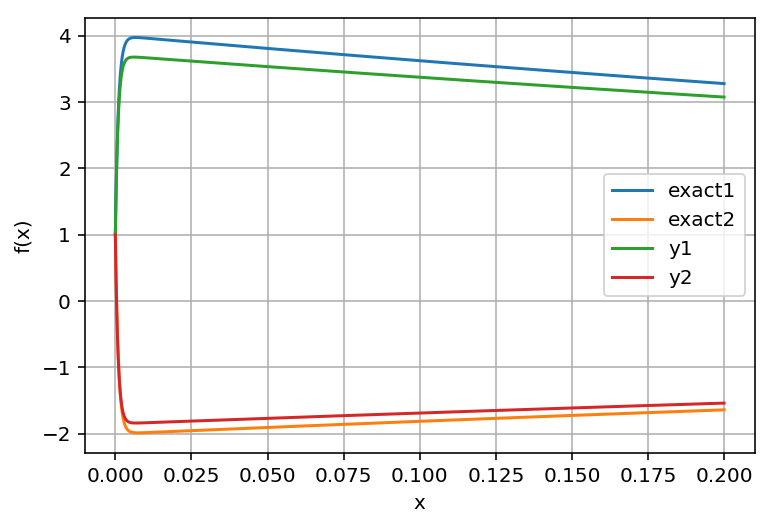

In [41]:
n=2500
y1_rk4,y2_rk4=rk4(n,0,0.2)
h=(0.2-0)/n
x=np.arange(0,0.2,h)
plt.plot(x,f1_exact(x),label='exact1')
plt.plot(x,f2_exact(x),label='exact2')
plt.plot(x,y1_rk4,label='y1')
plt.plot(x,y2_rk4,label='y2')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

In [42]:
h=[0.2,0.1,0.05,0.025,0.0125,6.25e-3,3.125e-3,1/640,1/1280,1/2560,1/5120,1/10240]

In [43]:
e1_rk4=[]
e2_rk4=[]
for i in range(12):
    a=0
    b=0.2
    x=np.arange(a,b,h[i])    
    y1_rk4=rk4(N[i],0,0.2)[0]
    y2_rk4=rk4(N[i],0,0.2)[1]
    er1_rk4=abs((y1_rk4[i]-f1_exact(x[i]))/f1_exact(x[i]))
    er2_rk4=abs((y2_rk4[i]-f2_exact(x[i]))/f2_exact(x[i]))
    e1_rk4.append(er1_rk4)
    e2_rk4.append(er2_rk4)

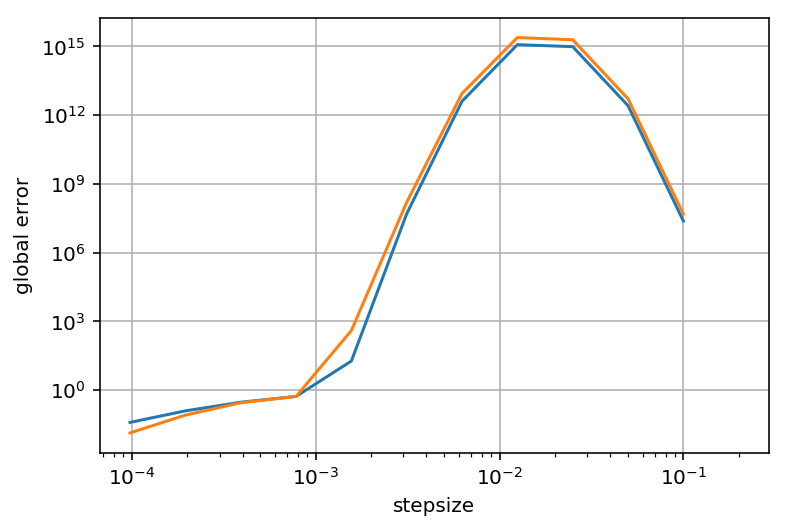

In [44]:
plt.plot(h,e1_rk4)
plt.plot(h,e2_rk4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("stepsize")
plt.ylabel("global error")
plt.grid()

### 4) Implicit Euler method

In [45]:
def eulerimp(n,a,b):
    y1_imp=np.zeros(n,float)
    y2_imp=np.zeros(n,float)
    y1_imp[0]=1
    y2_imp[0]=1
    h=(b-a)/n
    x=np.arange(a,b,h)
    for i in range(n-1):
        y1_imp[i+1]=(y1_imp[i]/(1-999*h))+(1999*h/(1-999*h))*((y2_imp[i]*(1-999*h)-1000*y1_imp[i]*h)/(1000*h**2+1001*h+1) )
        y2_imp[i+1]=(y2_imp[i]*(1-999*h)-1000*y1_imp[i]*h)/(1000*h**2+1001*h+1)           
    return y1_imp, y2_imp

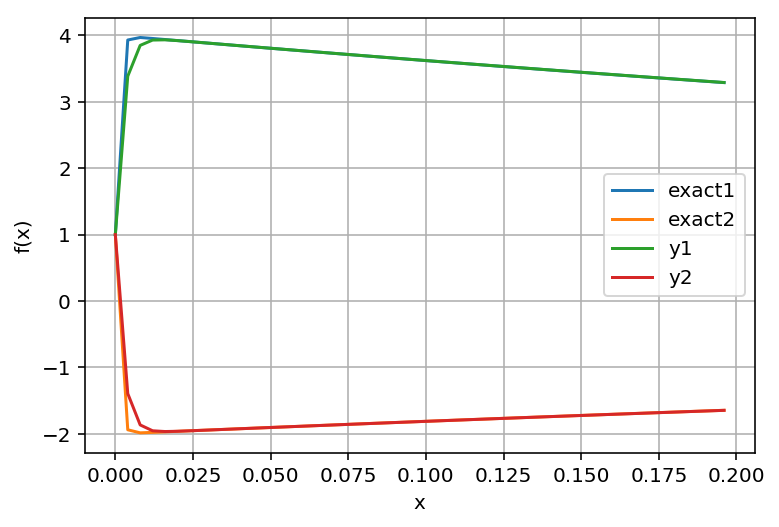

In [46]:
n=50
y1_imp,y2_imp=eulerimp(n,0,0.2)
h=(0.2-0)/n
x=np.arange(0,0.2,h)
plt.plot(x,f1_exact(x),label='exact1')
plt.plot(x,f2_exact(x),label='exact2')
plt.plot(x,y1_imp,label='y1')
plt.plot(x,y2_imp,label='y2')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

In [47]:
h=[0.2,0.1,0.05,0.025,0.0125,6.25e-3,3.125e-3,1/640,1/1280,1/2560,1/5120,1/10240]

In [48]:
e1_im=[]
e2_im=[]
for i in range(12):
    x=np.arange(0,0.2,h[i])    
    y1_im=eulerimp(N[i],0,0.2)[0]
    y2_im=eulerimp(N[i],0,0.2)[1]
    er1_im=abs((y1_im[i]-f1_exact(x[i]))/f1_exact(x[i]))
    er2_im=abs((y2_im[i]-f2_exact(x[i]))/f2_exact(x[i]))
    e1_im.append(er1_im)
    e2_im.append(er2_im)

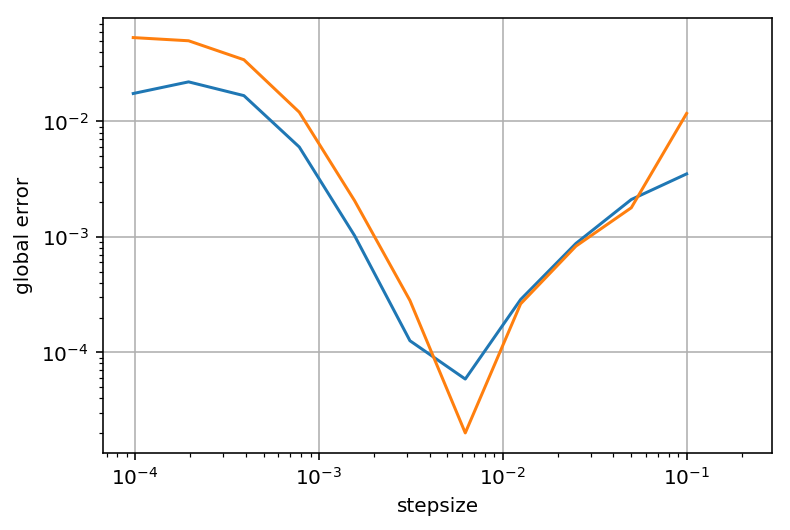

In [51]:
plt.plot(h,e1_im)
plt.plot(h,e2_im)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("stepsize")
plt.ylabel("global error")
plt.grid()

#### Stability of solutions of the system:

First, if we consider analytically: 
The stepsize h that satisfies $h < \frac{2}{a} = \frac{2}{1000} = 0.002$ yields stable solution.

If $h > 0.002$ or $h = 0.002$, the solution is unstable.
This yields for explicit Euler method, midpoint and Runge-Kutta 4th method. However, it turns out that the implicit Euler method is unconditionally stable because of the fact that: 
                                       $$y_{i+1}=\frac{y_i}{1+ah}$$
So that we will get $y_i$ going to infinity when i goes to infinity.

Moreover, it is also can be seen from the following graphs of stepsize vs. error that when h<0.002 we can see that error increases when h increases. It means that we have the following relationships: 

1) Explicit Euler: $E$~$O(h)$
2) Midpoint: $E$~$O(h^2)$
3) Runge Kutta 4: $E$~$O(h^4)$


                                                Conclusion
Finally, the objectives of the experiment were achieved. The system consisting of two differential equations was solved using four different methods. Based on the results, the following conlclusions were drawn:
1) Explicit Euler method is one of the basic methods for solving ODEs. However, the main drawback is its unstability when solving stiff ODEs. It is also can be noted that if our stepsize will be greater than 0.002, we obtain oscillations in our graph of the solution. 
2) The midpoint method is an improved version of Euler's method. It uses Euler's method to predict values at the midpoint of the interval. 
3) The classical Runge-Kutta method of order 4 is one of the widely used methods. 
4) In the implicit Euler method, the unknowns appear on both sides of the equation. It is also can be seen that this method is unconditionally stable and only first-order accurate. 

Furthermore, we can see that the Runge-Kutta method would have approximately the same limitation on the stepsize. However, when solving stiff ODEs, the usual methods of solution, such as the Runge-Kutta formulas, become impractical because of the very small h required for stability (as was shown in the graph).
The above graphs leads us to conclusion that the higher-order methods attain better accuracy. However, it is also important to note that computational cost and accuracy requirements of the problems also must be considered when choosing a method. 